In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import boto3
import io

In [2]:
# Configuración del bucket S3 y archivo CSV
bucket = 'weatherjie2024'  # Nombre del bucket S3 existente
file_key = 'weather_data.csv'  # Nombre del archivo CSV en S3

In [3]:
# Descargar el archivo CSV desde S3
print("Descargando archivo CSV desde S3...")
s3 = boto3.client('s3')
response = s3.get_object(Bucket=bucket, Key=file_key)

Descargando archivo CSV desde S3...


In [4]:
# Cargar datos en un DataFrame de pandas
weather_data = pd.read_csv(io.BytesIO(response['Body'].read()))
print("Datos cargados correctamente:")
print(weather_data.head())

Datos cargados correctamente:
     city                   timestamp  temperature    weather  humidity  \
0  Madrid  2024-12-15T18:44:45.508063         7.74  clear sky        70   
1  Madrid  2024-12-16T18:39:34.861398         7.74  clear sky        70   
2  Madrid  2024-12-17T18:51:51.702618         6.38  clear sky        76   
3  Madrid  2024-09-08T20:10:34.337223        22.90     cloudy        49   
4  Madrid  2024-09-09T20:10:34.337223        12.00       rain        68   

   wind_speed  
0        1.54  
1        1.54  
2        1.03  
3        9.60  
4       10.50  


In [5]:
# Preprocesamiento de datos
print("\nPreprocesando datos...")
weather_data.dropna(inplace=True)
weather_data['temperature'] = pd.to_numeric(weather_data['temperature'], errors='coerce')
X = weather_data[['humidity', 'wind_speed']]
y = weather_data['temperature']


Preprocesando datos...


In [6]:
# Dividir los datos en conjunto de entrenamiento y prueba
print("\nDividiendo datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dividiendo datos en entrenamiento y prueba...


In [7]:
# Entrenar un modelo de regresión lineal
print("\nEntrenando modelo de regresión lineal...")
model = LinearRegression()
model.fit(X_train, y_train)


Entrenando modelo de regresión lineal...


LinearRegression()

In [8]:
# Hacer predicciones
print("\nRealizando predicciones...")
y_pred = model.predict(X_test)


Realizando predicciones...


In [9]:
# Evaluar el modelo
print("\nEvaluación del modelo:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente R²: {r2}")


Evaluación del modelo:
Error cuadrático medio (MSE): 77.70129495362823
Coeficiente R²: -0.0005830431964295446


In [10]:
# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo:")
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)



Coeficientes del modelo:
Coeficientes: [0.00931306 0.27685584]
Intercepto: 19.228878814436005


In [11]:
# Guardar las predicciones en un nuevo DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nResultados de predicciones:")
print(results.head())


Resultados de predicciones:
    Actual  Predicted
30    34.5  20.965533
67    28.6  22.474939
62    12.5  20.804998
47    10.1  21.718369
42    12.5  20.504951


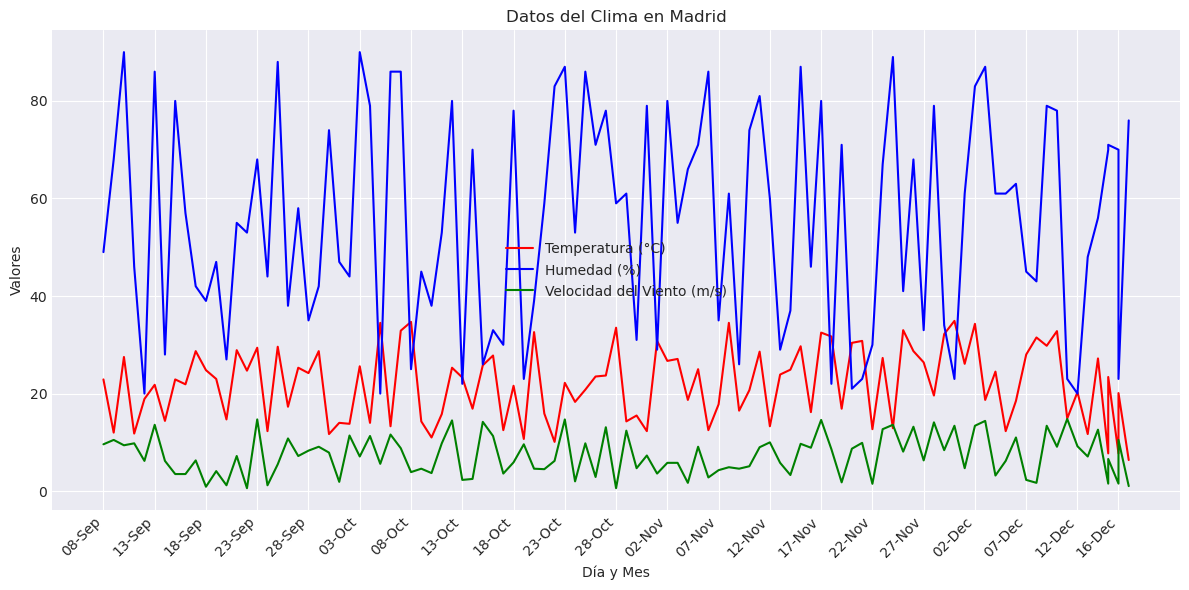

In [16]:
# Importar librerías adicionales
import matplotlib.pyplot as plt

# Convertir la columna timestamp a datetime
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])

# Ordenar los datos por fecha
weather_data = weather_data.sort_values(by='timestamp')

# Extraer día y mes para el eje X
weather_data['day_month'] = weather_data['timestamp'].dt.strftime('%d-%b')

# Limpiar la figura
plt.figure(figsize=(12, 6))
plt.clf()

# Graficar las variables
plt.plot(weather_data['day_month'], weather_data['temperature'], label='Temperatura (°C)', color='red', linewidth=1.5)
plt.plot(weather_data['day_month'], weather_data['humidity'], label='Humedad (%)', color='blue', linewidth=1.5)
plt.plot(weather_data['day_month'], weather_data['wind_speed'], label='Velocidad del Viento (m/s)', color='green', linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Día y Mes')
plt.ylabel('Valores')
plt.title('Datos del Clima en Madrid')
plt.legend()

# Etiquetas del eje X más claras
plt.xticks(weather_data['day_month'][::5], rotation=45, ha="right")

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()